In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 日本語フォントの設定
plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False


In [4]:
# データ準備（初心者向け）
np.random.seed(42) # ランダムな数値の種(シード)→同じパターンの数値を生成できる(再現性のため)
n = 50

# 勉強時間を0～10の整数でランダムに作成
study_hours = np.random.randint(0, 11, size=n) # randint→整数の乱数を生成

# テスト得点を作成（勉強時間×5 + ±10点のノイズ）
noise = np.random.randint(-10, 11, size=n) # ノイズを-10から10の範囲で生成(実際のデータのばらつきを模倣)
test_scores = 50 + 5 * study_hours + noise # 綺麗な相関が出てしまうのでノイズを加える

# 得点を0～100の範囲に制限
test_scores = np.clip(test_scores, 0, 100) # clip→配列の値を指定した範囲に制限

# データフレーム作成
df = pd.DataFrame({
    '勉強時間': study_hours,
    'テスト得点': test_scores
})
# print(df.head())
df

,勉強時間,テスト得点
0,6,90
1,3,56
2,10,100
3,7,89
4,4,66
5,6,81
6,9,92
7,2,64
8,6,72
9,10,100


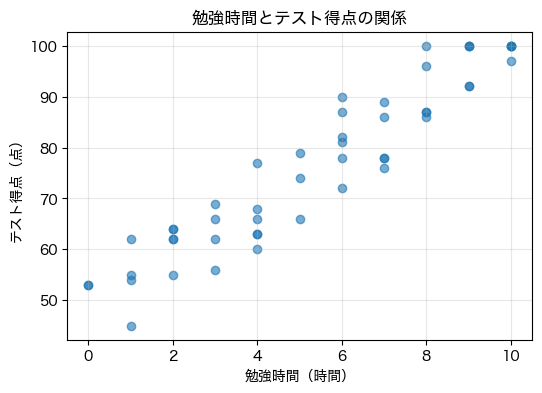

In [5]:
# 基本的な散布図
plt.figure(figsize=(6, 4))
plt.scatter(df['勉強時間'], df['テスト得点'], alpha=0.6)
plt.xlabel('勉強時間（時間）')
plt.ylabel('テスト得点（点）')
plt.title('勉強時間とテスト得点の関係')
plt.grid(True, alpha=0.3)
plt.show()


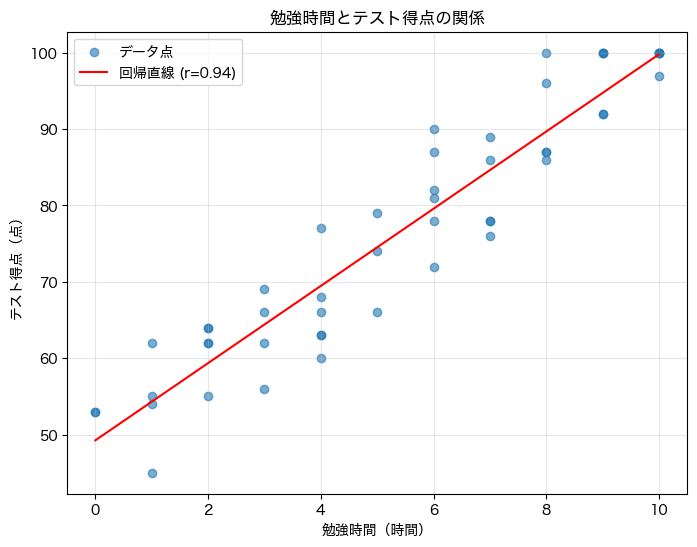

相関係数: 0.945
p値: 0.000


In [6]:
# 散布図に回帰直線を追加
plt.figure(figsize=(8, 6))
plt.scatter(df['勉強時間'], df['テスト得点'], alpha=0.6, label='データ点')

# 回帰直線の計算
slope, intercept, r_value, p_value, std_err = stats.linregress(df['勉強時間'], df['テスト得点'])
x_line = np.array([df['勉強時間'].min(), df['勉強時間'].max()])
y_line = slope * x_line + intercept

plt.plot(x_line, y_line, 'r-', label=f'回帰直線 (r={r_value:.2f})')
plt.xlabel('勉強時間（時間）')
plt.ylabel('テスト得点（点）')
plt.title('勉強時間とテスト得点の関係')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 相関係数の表示
print(f"相関係数: {r_value:.3f}")
print(f"p値: {p_value:.3f}")


In [7]:
import numpy as np
import pandas as pd

# より複雑なデータセットの作成
# 123は、ランダムな数値のシード値で、同じシードを使うと同じランダムなデータが生成されます。
np.random.seed(123)
n = 100

# 変数の生成
age = np.random.normal(35, 10, n)
experience = age - 22 + np.random.normal(0, 3, n)  # 年齢と相関
satisfaction = np.random.normal(3, 1, n).clip(1, 5)  # 独立
income = 30000 + 1000 * experience + np.random.normal(0, 5000, n)  # 経験と相関

# データフレームの作成
df_multi = pd.DataFrame({
    '年齢': age,
    '経験年数': experience.clip(0, None),
    '満足度': satisfaction,
    '年収': income / 10000  # 万円単位
})

df_multi

,年齢,経験年数,満足度,年収
0,24.143694,4.069858,3.703310,3.789513
1,44.973454,17.039791,2.401895,4.289485
2,37.829785,17.966579,5.000000,4.467082
3,19.937053,5.731965,3.688297,3.878758
4,29.213997,7.140120,2.993693,3.642005
...,...,...,...,...
95,45.311145,13.617980,3.695787,4.158042
96,24.154321,1.346440,4.875801,2.988891
97,21.365285,0.000000,3.415695,3.025963
98,38.794006,15.770221,3.160544,4.492809


In [9]:
# 相関行列の計算
correlation_matrix = df_multi.corr()
print("相関行列:")
correlation_matrix.round(3)


相関行列:


,年齢,経験年数,満足度,年収
年齢,1.000,0.952,-0.072,0.891
経験年数,0.952,1.000,-0.063,0.917
満足度,-0.072,-0.063,1.000,0.015
年収,0.891,0.917,0.015,1.000


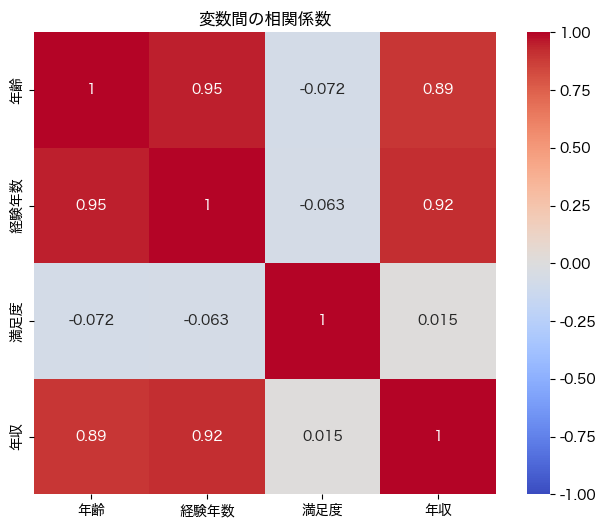

In [10]:
# 相関行列のヒートマップ
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,  # 数値を表示
            cmap='coolwarm',  # カラーマップ
            center=0,  # 0を中心に
            vmin=-1, vmax=1,  # 範囲を-1から1に
            square=True)  # 正方形のセル
plt.title('変数間の相関係数')
plt.show()


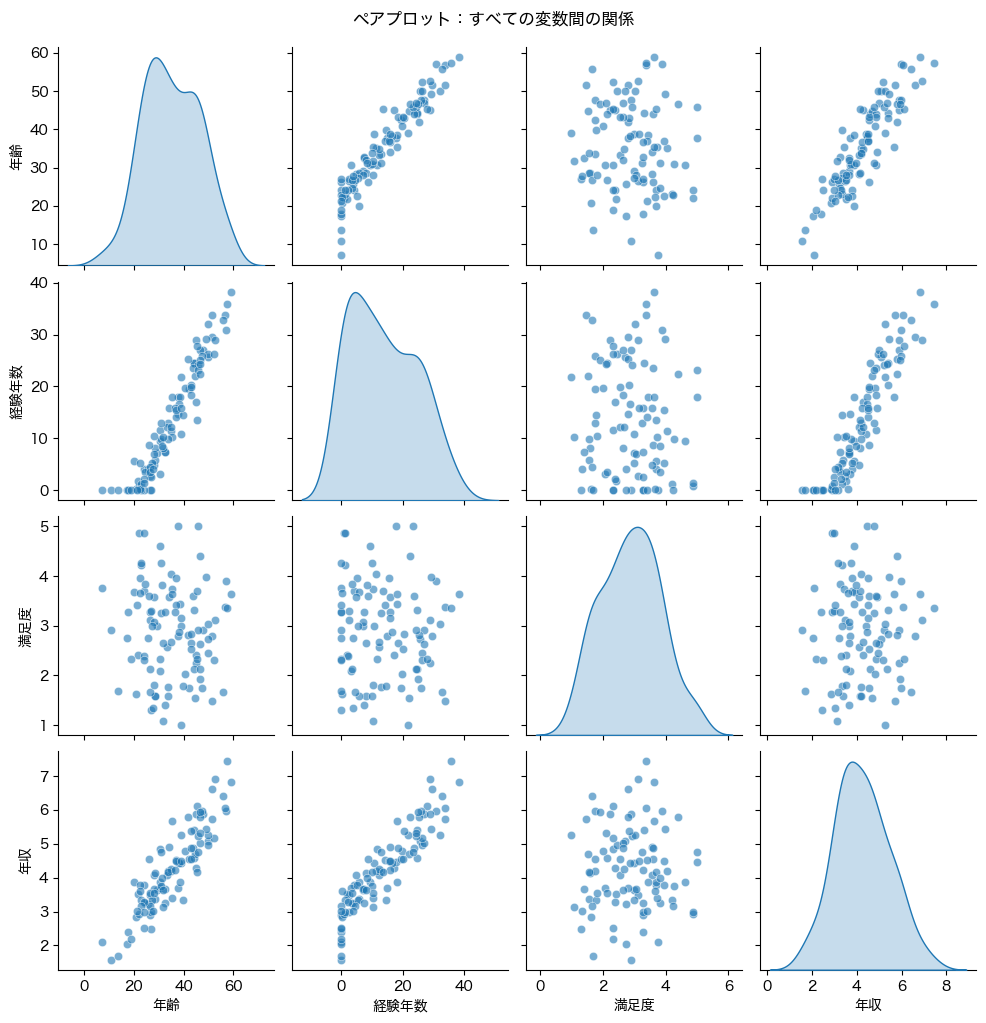

In [11]:
# すべての変数間の関係を一度に可視化
sns.pairplot(df_multi, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('ペアプロット：すべての変数間の関係', y=1.02)
plt.show()


### p値と回帰直線の説明
p値とは相関が本当に意味のある関係性かどうかを判断するための統計指標である。p値<0.05の場合、一般的に有意水準が0.05のため統計的に有意な相関があると判断される。

回帰直線とはデータポイントの分布から最適な直線を推定し、2つの変数間の関係性を直線で表したもの。回帰直線を用いることで、2つの変数の関係を簡潔に表現できる。(おおよその関係性が一目でわかる！)最適な直線とは「最小二乗法」で求められた直線であり、データポイントと直線の間の距離の二条和が最小になるように計算される。
これにより、将来の値を予測することも可能になる。

